In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
# Função para plotar regiões de decisão
def plot_svm(ax, X, y, clf, title):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 500),
                         np.linspace(X[:,1].min()-1, X[:,1].max()+1, 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z > 0, alpha=0.2, levels=[-1, 0, 1], colors=['blue', 'red'])
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    ax.scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolor='k', label='Classe Azul')
    ax.scatter(X[y==1, 0], X[y==1, 1], color='red', edgecolor='k', label='Classe Vermelha')
    ax.set_title(title)

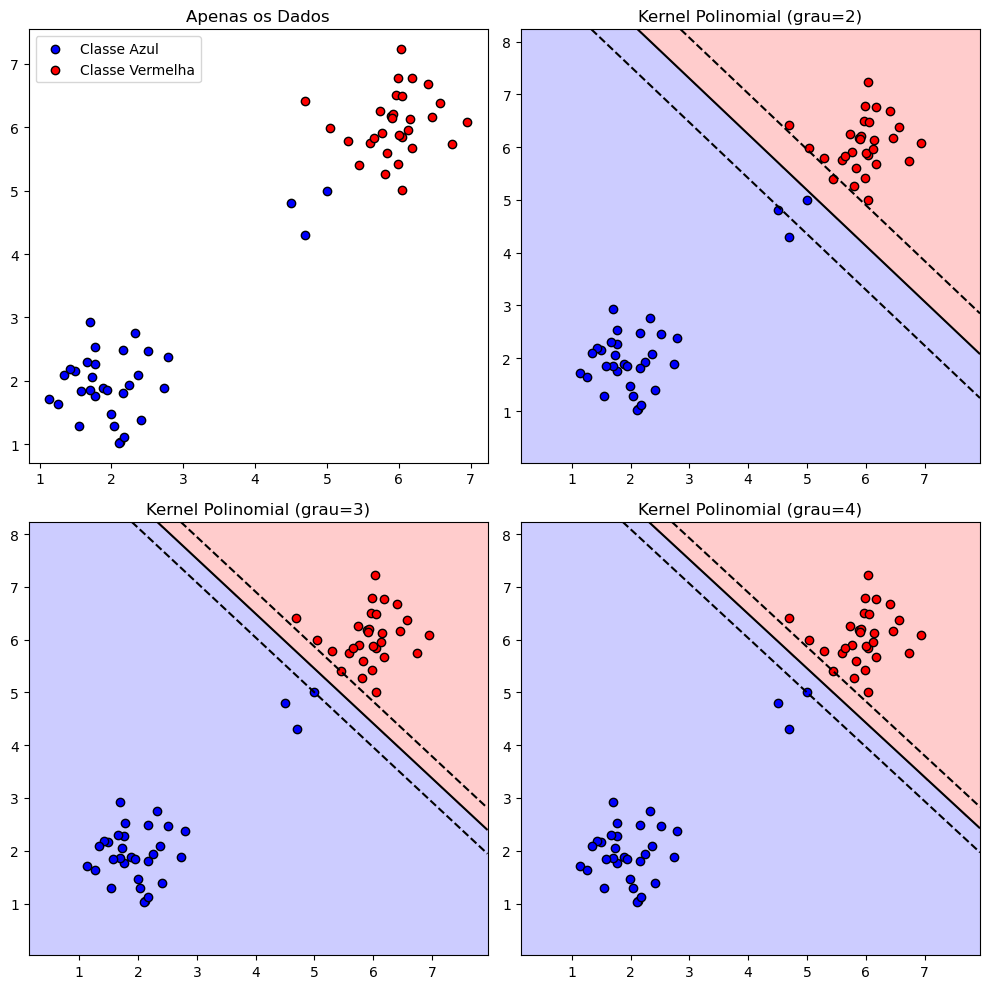

In [15]:
# Gerar dados sintéticos para visualizar kernels
np.random.seed(42)
X_blue = np.random.randn(30, 2) * 0.5 + np.array([2, 2])
blue_outliers = np.array([[4.5, 4.8], [4.7, 4.3], [5, 5]])
X_red = np.random.randn(30, 2) * 0.5 + np.array([6, 6])

X = np.vstack([X_blue, blue_outliers, X_red])
y = np.array([0]*33 + [1]*30)

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Apenas os dados
axs[0, 0].scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolor='k', label='Classe Azul')
axs[0, 0].scatter(X[y==1, 0], X[y==1, 1], color='red', edgecolor='k', label='Classe Vermelha')
axs[0, 0].set_title('Apenas os Dados')
axs[0, 0].legend()

# Polinomial grau 2
clf_poly2 = SVC(kernel='poly', degree=2, C=1.0)
clf_poly2.fit(X, y)
plot_svm(axs[0, 1], X, y, clf_poly2, 'Kernel Polinomial (grau=2)')

# Polinomial grau 3
clf_poly3 = SVC(kernel='poly', degree=3, C=1.0)
clf_poly3.fit(X, y)
plot_svm(axs[1, 0], X, y, clf_poly3, 'Kernel Polinomial (grau=3)')

# Polinomial grau 4
clf_poly4 = SVC(kernel='poly', degree=4, C=1.0)
clf_poly4.fit(X, y)
plot_svm(axs[1, 1], X, y, clf_poly4, 'Kernel Polinomial (grau=4)')

plt.tight_layout()
plt.show()

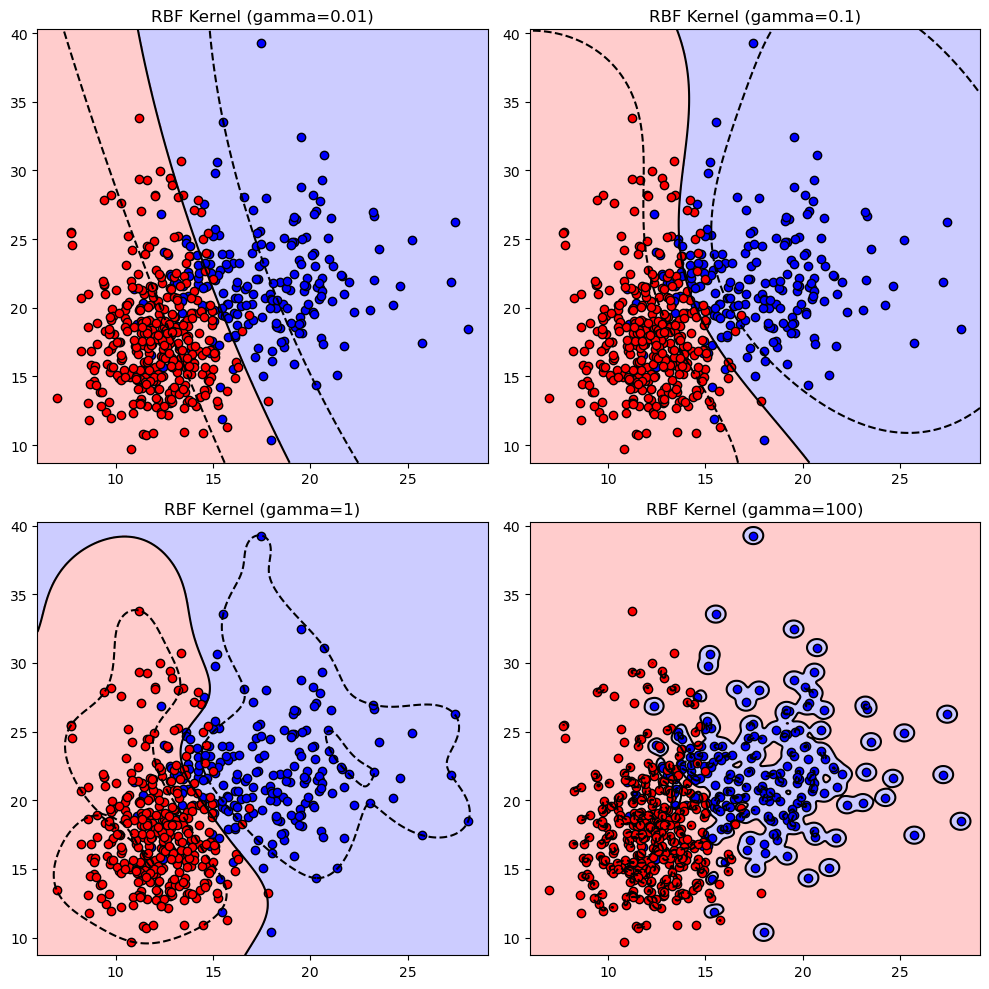

In [13]:
# Breast Cancer Wisconsin (apenas duas features para visualização)
bc = datasets.load_breast_cancer()
X_bc = bc.data[:, :2]  # Usando só as duas primeiras features
y_bc = bc.target

# Parâmetros gamma a testar
gamma_values = [0.01, 0.1, 1, 100]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for ax, gamma in zip(axs.ravel(), gamma_values):
    clf_bc_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma=gamma))
    clf_bc_rbf.fit(X_bc, y_bc)
    plot_svm(ax, X_bc, y_bc, clf_bc_rbf, f'RBF Kernel (gamma={gamma})')

plt.tight_layout()
plt.show()